In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#DATA LENGKAP 7 VARIABEL

##DATA

In [2]:
df=pd.read_excel('Dataset Model 1.xlsx').set_index('nama_kabupaten_kota')
df

,jumlah_penduduk,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,jumlah_fasilitas_kesehatan
nama_kabupaten_kota,,,,,,,
Kepulauan Seribu,29230,68.76,0.2240,0.1031,0.096701,0.0273,7
Jakarta Selatan,2367002,74.12,0.3175,0.1368,0.163100,0.0568,134
Jakarta Timur,3234003,74.47,0.3326,0.1334,0.152697,0.0441,139
Jakarta Pusat,1153399,74.11,0.4122,0.1843,0.233388,0.0599,80
Jakarta Barat,2569462,73.62,0.3412,0.1255,0.164697,0.0401,104
...,...,...,...,...,...,...,...
Puncak,115323,65.74,0.0973,0.0581,0.066067,0.0037,0
Dogiyai,99277,65.73,0.1462,0.0340,0.054971,0.0115,1
Intan Jaya,50599,65.60,0.0705,0.0601,0.059206,0.0353,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 514 entries, Kepulauan Seribu to Kota Jayapura
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   jumlah_penduduk               514 non-null    int64  
 1   umur_harapan_hidup            514 non-null    float64
 2   persentase_keluhan_kesehatan  514 non-null    float64
 3   persentase_menderita_sakit    514 non-null    float64
 4   persentase_berobat_jalan      514 non-null    float64
 5   persentase_rawat_inap         514 non-null    float64
 6   jumlah_fasilitas_kesehatan    514 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 32.1+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

jumlah_penduduk                 0
umur_harapan_hidup              0
persentase_keluhan_kesehatan    0
persentase_menderita_sakit      0
persentase_berobat_jalan        0
persentase_rawat_inap           0
jumlah_fasilitas_kesehatan      0
dtype: int64

##DESKRIPTIF

In [6]:
df.describe()

,jumlah_penduduk,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,jumlah_fasilitas_kesehatan
count,5.140000e+02,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,5.283095e+05,69.534047,0.284564,0.136509,0.127601,0.047800,21.632296
std,6.524835e+05,3.468444,0.082796,0.042707,0.048926,0.018959,19.482061
min,1.402100e+04,55.270000,0.002300,0.000600,0.000554,0.000000,0.000000
25%,1.530330e+05,67.217500,0.229225,0.103400,0.090263,0.035900,11.000000
50%,2.798570e+05,69.870000,0.286500,0.135099,0.126064,0.047100,18.000000
75%,6.455332e+05,71.862500,0.337850,0.167725,0.159021,0.059850,27.000000
max,6.088233e+06,77.650000,0.572500,0.273900,0.276433,0.109000,139.000000


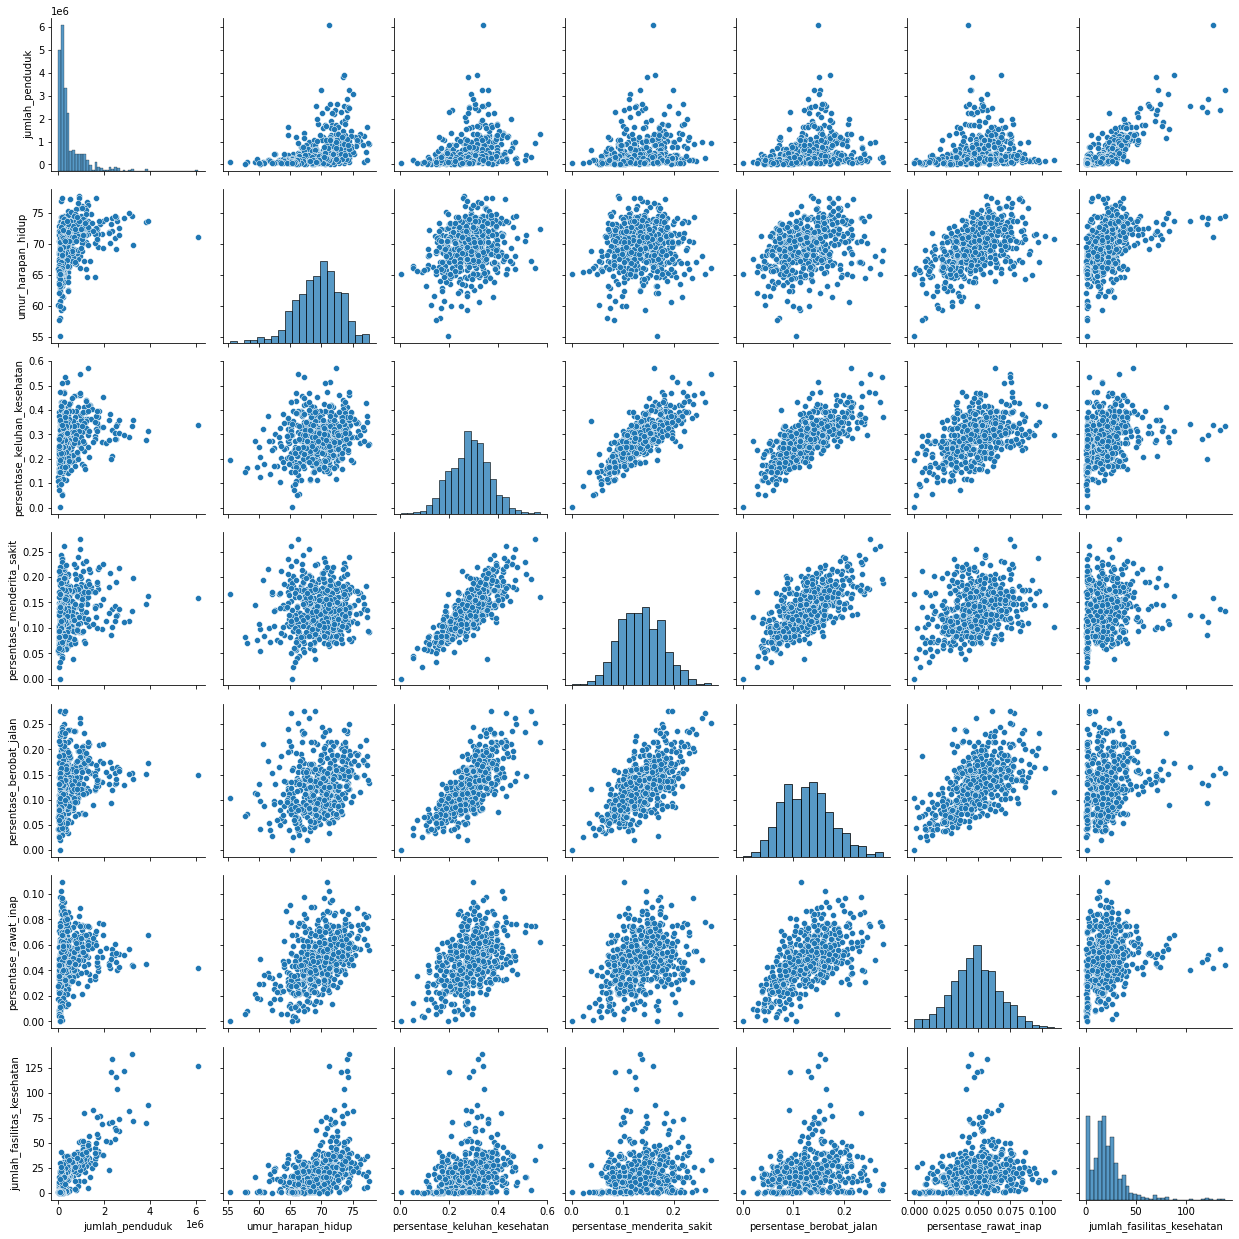

In [7]:
sns.pairplot(df)

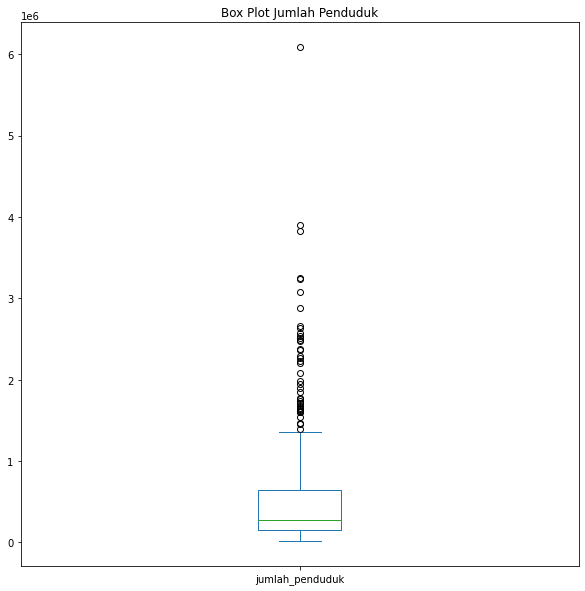

In [8]:
df[['jumlah_penduduk']].plot(figsize = (10,10), kind = 'box', title = 'Box Plot Jumlah Penduduk')
plt.show()

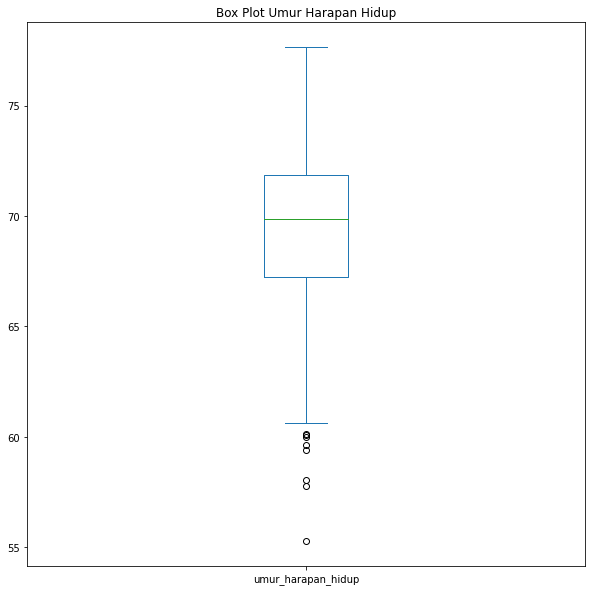

In [9]:
df[['umur_harapan_hidup']].plot(figsize = (10,10), kind = 'box', title = 'Box Plot Umur Harapan Hidup')
plt.show()

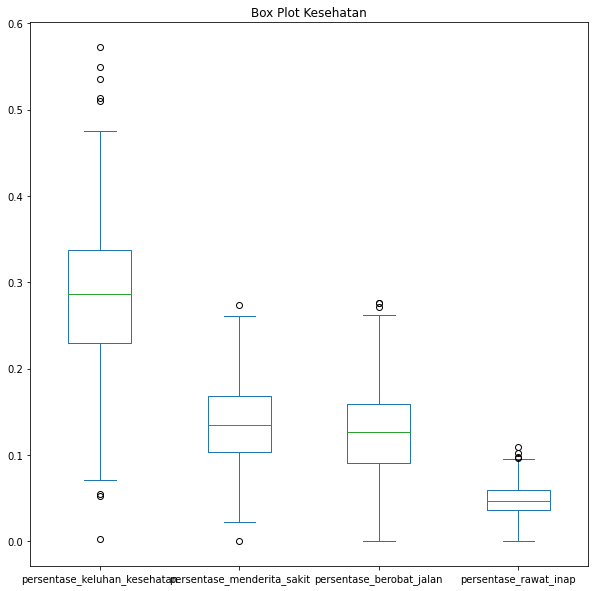

In [10]:
df[['persentase_keluhan_kesehatan','persentase_menderita_sakit', 'persentase_berobat_jalan', 'persentase_rawat_inap']].plot(figsize = (10,10), kind = 'box', title = 'Box Plot Kesehatan')
plt.show()

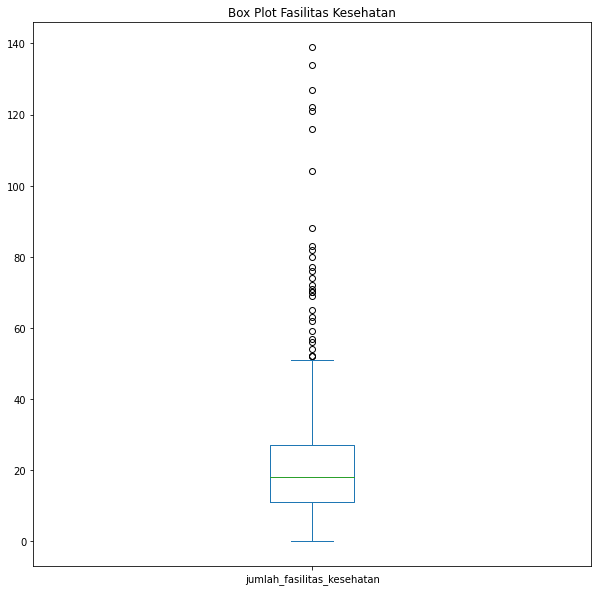

In [11]:
df[['jumlah_fasilitas_kesehatan']].plot(figsize = (10,10), kind = 'box', title = 'Box Plot Fasilitas Kesehatan')
plt.show()

##CLEANING

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print("Kabupaten/Kota yang Memiliki Nilai Outlier:")
print(df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)])
print('\n')
df = df[~((df< (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
print("Kabupaten/Kota Shape Setelah Membuang Ouliers:", df.shape)

Kabupaten/Kota yang Memiliki Nilai Outlier:
                     jumlah_penduduk  umur_harapan_hidup  \
nama_kabupaten_kota                                        
Jakarta Selatan              2367002               74.12   
Jakarta Timur                3234003               74.47   
Jakarta Pusat                1153399               74.11   
Jakarta Barat                2569462               73.62   
Jakarta Utara                1843537               73.28   
...                              ...                 ...   
Asmat                          98885               58.05   
Mamberamo Raya                 24773               57.77   
Nduga                          99817               55.27   
Lanny Jaya                    180305               66.06   
Deiyai                         74529               65.24   

                     persentase_keluhan_kesehatan  persentase_menderita_sakit  \
nama_kabupaten_kota                                                             
Jakarta Selat

##UJI ASUMSI KLASIK

In [13]:
#Normality test

from scipy.stats import shapiro

stat, p = shapiro(df['umur_harapan_hidup'])
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

stat=0.997, p=0.736

Berdistribusi Normal


In [14]:
#Normality test

from scipy.stats import shapiro

stat, p = shapiro(df['jumlah_penduduk'])
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

stat=0.833, p=0.000

Tidak berdistribusi Normal


In [15]:
#Normality test

from scipy.stats import shapiro

stat, p = shapiro(df['persentase_keluhan_kesehatan'])
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

stat=0.997, p=0.489

Berdistribusi Normal


In [16]:
#Normality test

from scipy.stats import shapiro

stat, p = shapiro(df['persentase_menderita_sakit'])
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

stat=0.995, p=0.115

Berdistribusi Normal


In [17]:
#Normality test

from scipy.stats import shapiro

stat, p = shapiro(df['persentase_berobat_jalan'])
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

stat=0.984, p=0.000

Tidak berdistribusi Normal


In [18]:
#Normality test

from scipy.stats import shapiro

stat, p = shapiro(df['persentase_rawat_inap'])
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

stat=0.996, p=0.253

Berdistribusi Normal


In [19]:
#Normality test

from scipy.stats import shapiro

stat, p = shapiro(df['jumlah_fasilitas_kesehatan'])
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

stat=0.973, p=0.000

Tidak berdistribusi Normal


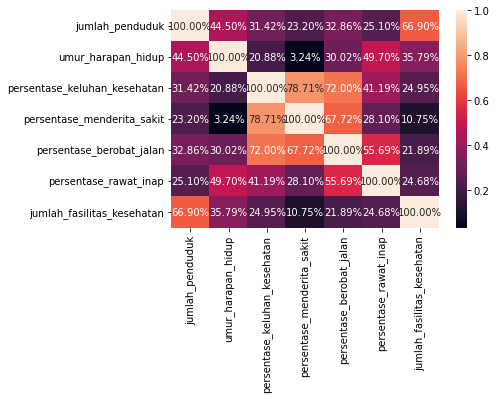

In [20]:
#Linearity test
corr = df.corr()
hmcorr = sns.heatmap(corr, annot=True, fmt='.2%')
hmcorr
plt.show()

In [21]:
#Multicollinearity test
features = ['jumlah_penduduk','persentase_keluhan_kesehatan','persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','jumlah_fasilitas_kesehatan']

X = df[features]
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_variables = X.columns
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = pd.DataFrame({'Variable': model_variables, 'VIF': vif_values})
vif
vif.sort_values('VIF', ascending=False).reset_index(drop=True)

,Variable,VIF
0,persentase_keluhan_kesehatan,43.963232
1,persentase_menderita_sakit,33.561803
2,persentase_berobat_jalan,21.603081
3,persentase_rawat_inap,10.594920
4,jumlah_fasilitas_kesehatan,6.429645
5,jumlah_penduduk,4.522078


In [22]:
#Multicollinearity test 2
features = ['jumlah_penduduk','persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','jumlah_fasilitas_kesehatan']

X = df[features]
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_variables = X.columns
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = pd.DataFrame({'Variable': model_variables, 'VIF': vif_values})
vif
vif.sort_values('VIF', ascending=False).reset_index(drop=True)

,Variable,VIF
0,persentase_berobat_jalan,20.273329
1,persentase_menderita_sakit,14.896074
2,persentase_rawat_inap,10.038235
3,jumlah_fasilitas_kesehatan,6.111556
4,jumlah_penduduk,4.514485


In [23]:
#Multicollinearity test 3
features = ['jumlah_penduduk','persentase_menderita_sakit','persentase_rawat_inap','jumlah_fasilitas_kesehatan']

X = df[features]
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_variables = X.columns
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = pd.DataFrame({'Variable': model_variables, 'VIF': vif_values})
vif
vif.sort_values('VIF', ascending=False).reset_index(drop=True)

,Variable,VIF
0,persentase_rawat_inap,7.630178
1,persentase_menderita_sakit,7.325379
2,jumlah_fasilitas_kesehatan,6.100462
3,jumlah_penduduk,4.412916


In [24]:
#define response variable
y = df['umur_harapan_hidup']

#define predictor variables
x = df[['jumlah_penduduk','persentase_menderita_sakit','persentase_rawat_inap','jumlah_fasilitas_kesehatan']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
#Heteroscedasticity test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

AssertionError: ignored

##ANALISIS REGRESI

In [26]:
X = sm.add_constant(df[['jumlah_penduduk','persentase_menderita_sakit','persentase_rawat_inap','jumlah_fasilitas_kesehatan']].to_numpy())
y = df['umur_harapan_hidup'].to_numpy()
LR = sm.OLS(y, X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     69.60
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           1.13e-45
Time:                        13:25:27   Log-Likelihood:                -1045.9
No. Observations:                 447   AIC:                             2102.
Df Residuals:                     442   BIC:                             2122.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.1686      0.482    137.228      0.0

Jumlah Penduduk
*   r_44.5% (sedang)
*   p-value_0.000 (<0.05 signifikan)
*   t-test_6.877 (>1.9653 berpengaruh)

Persentase Menderita Sakit
*   r_3.24% (sangat lemah)
*   p-value_0.000 (<0.05 signifikan)
*   t-test_-4.539 (<-1.9653 berpengaruh)

Persentase Rawat Inap
*   r_49.7% (sedang)
*   p-value_0.000 (<0.05 signifikan)
*   t-test_11.302 (>1.9653 berpengaruh)

Jumlah Fasilitas Kesehatan
*   r_35.79% (lemah)
*   p-value_0.566 (>0.05 tidak signifikan)
*   t-test_0.574 (<1.9653 tidak berpengaruh)

Model Regresi
*   F-test_69.6 (>5.63626498 simultan berpengaruh)
*   Adj R-squared_0.381 (rendah)

#DATA GABUNGAN 6 VARIABEL

##DATA

In [27]:
df=pd.read_excel('Dataset Model 2.xlsx').set_index('nama_kabupaten_kota')
df

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita
nama_kabupaten_kota,,,,,,
Kepulauan Seribu,68.76,0.2240,0.1031,0.096701,0.0273,0.000239
Jakarta Selatan,74.12,0.3175,0.1368,0.163100,0.0568,0.000057
Jakarta Timur,74.47,0.3326,0.1334,0.152697,0.0441,0.000043
Jakarta Pusat,74.11,0.4122,0.1843,0.233388,0.0599,0.000069
Jakarta Barat,73.62,0.3412,0.1255,0.164697,0.0401,0.000040
...,...,...,...,...,...,...
Puncak,65.74,0.0973,0.0581,0.066067,0.0037,0.000000
Dogiyai,65.73,0.1462,0.0340,0.054971,0.0115,0.000010
Intan Jaya,65.60,0.0705,0.0601,0.059206,0.0353,0.000020


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 514 entries, Kepulauan Seribu to Kota Jayapura
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   umur_harapan_hidup              514 non-null    float64
 1   persentase_keluhan_kesehatan    514 non-null    float64
 2   persentase_menderita_sakit      514 non-null    float64
 3   persentase_berobat_jalan        514 non-null    float64
 4   persentase_rawat_inap           514 non-null    float64
 5   fasilitas_kesehatan_per_kapita  514 non-null    float64
dtypes: float64(6)
memory usage: 28.1+ KB


In [29]:
df.duplicated().sum()

0

In [30]:
df.isnull().sum()

umur_harapan_hidup                0
persentase_keluhan_kesehatan      0
persentase_menderita_sakit        0
persentase_berobat_jalan          0
persentase_rawat_inap             0
fasilitas_kesehatan_per_kapita    0
dtype: int64

##DESKRIPTIF

In [31]:
df.describe()

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,69.534047,0.284564,0.136509,0.127601,0.047800,0.000064
std,3.468444,0.082796,0.042707,0.048926,0.018959,0.000054
min,55.270000,0.002300,0.000600,0.000554,0.000000,0.000000
25%,67.217500,0.229225,0.103400,0.090263,0.035900,0.000029
50%,69.870000,0.286500,0.135099,0.126064,0.047100,0.000051
75%,71.862500,0.337850,0.167725,0.159021,0.059850,0.000084
max,77.650000,0.572500,0.273900,0.276433,0.109000,0.000392


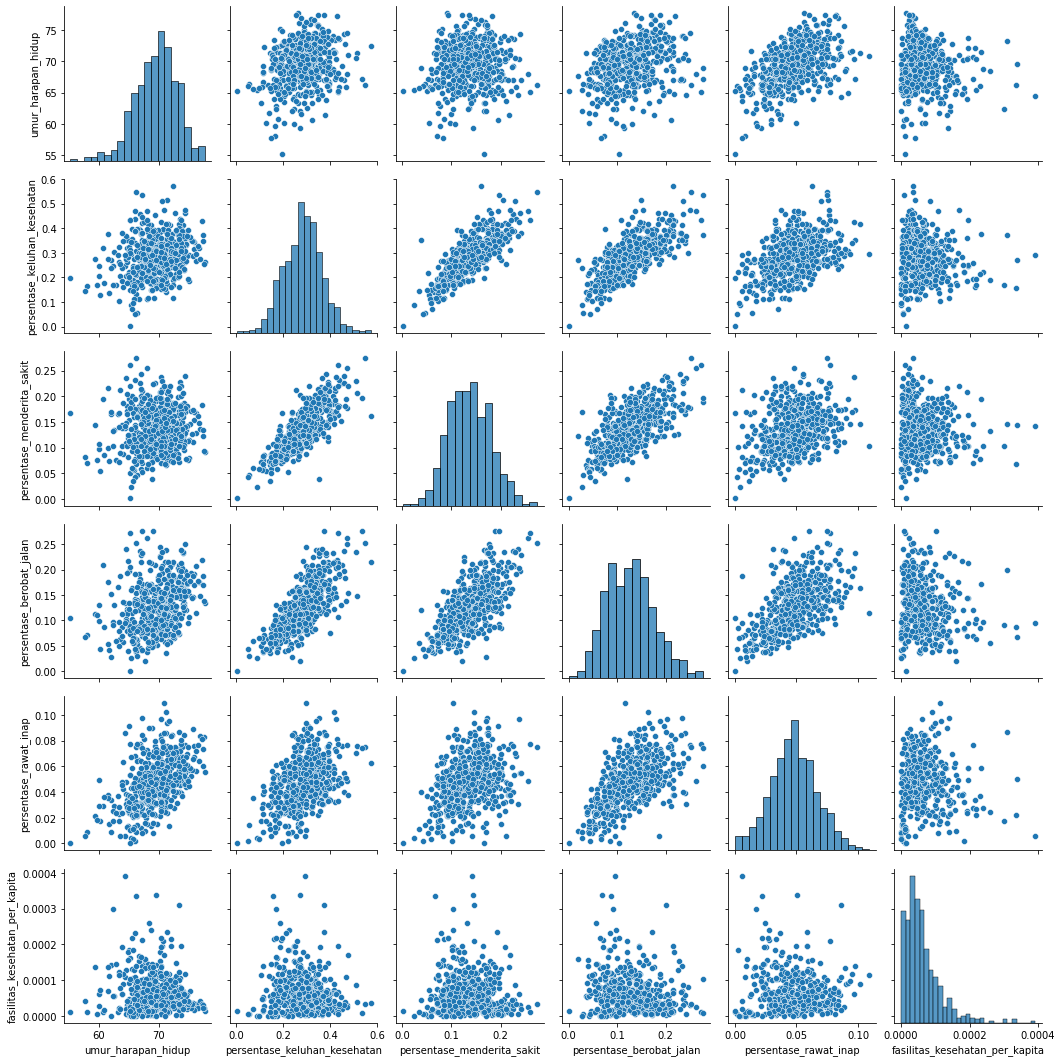

In [32]:
sns.pairplot(df)

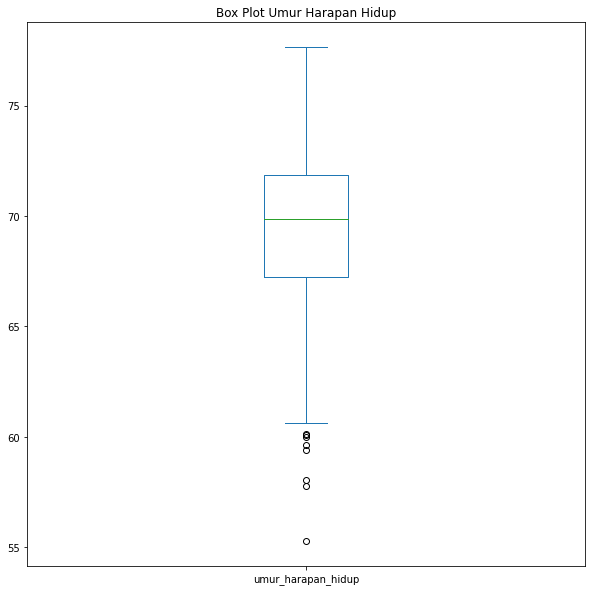

In [33]:
df[['umur_harapan_hidup']].plot(figsize = (10,10), kind = 'box', title = 'Box Plot Umur Harapan Hidup')
plt.show()

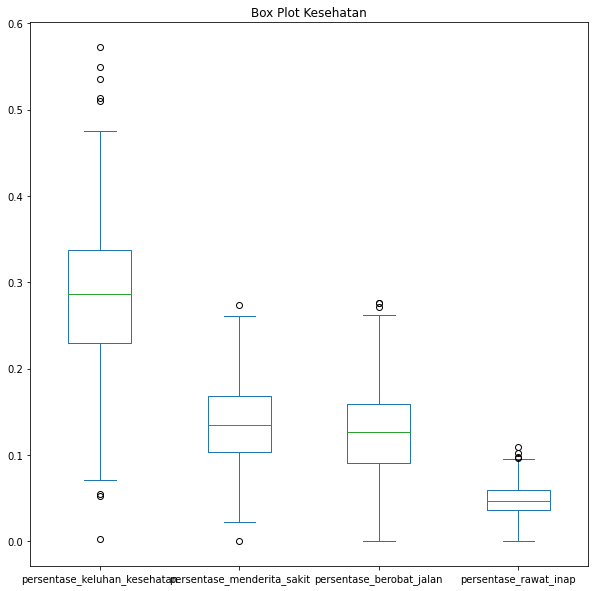

In [34]:
df[['persentase_keluhan_kesehatan','persentase_menderita_sakit', 'persentase_berobat_jalan', 'persentase_rawat_inap']].plot(figsize = (10,10), kind = 'box', title = 'Box Plot Kesehatan')
plt.show()

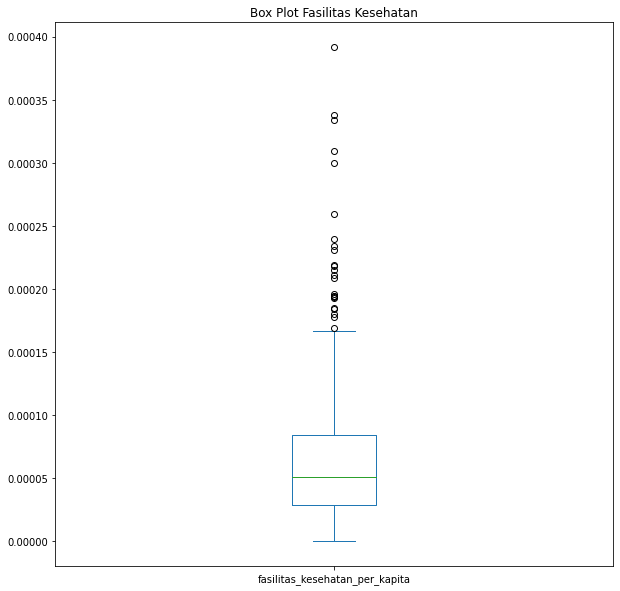

In [35]:
df[['fasilitas_kesehatan_per_kapita']].plot(figsize = (10,10), kind = 'box', title = 'Box Plot Fasilitas Kesehatan')
plt.show()

##CLEANING

In [36]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print("Kabupaten/Kota yang Memiliki Nilai Outlier:")
print(df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)])
print('\n')
df = df[~((df< (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
print("Kabupaten/Kota Shape Setelah Membuang Ouliers:", df.shape)

Kabupaten/Kota yang Memiliki Nilai Outlier:
                         umur_harapan_hidup  persentase_keluhan_kesehatan  \
nama_kabupaten_kota                                                         
Kepulauan Seribu                      68.76                        0.2240   
KABUPATEN PANGANDARAN                 71.40                        0.5130   
Kabupaten Jombang                     72.40                        0.5725   
Kota Blitar                           73.75                        0.4343   
Kota Mojokerto                        73.32                        0.3733   
ACEH JAYA                             67.16                        0.3508   
SABANG                                70.51                        0.2466   
Sibolga                               69.01                        0.3720   
Natuna                                65.06                        0.2238   
Kepulauan Anambas                     67.21                        0.1917   
Kota Sungai Penuh               

##UJI ASUMSI KLASIK

In [37]:
#Normality test

from scipy.stats import shapiro

stat, p = shapiro(df['umur_harapan_hidup'])
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

stat=0.996, p=0.272

Berdistribusi Normal


In [38]:
#Normality test

from scipy.stats import shapiro

stat, p = shapiro(df['persentase_keluhan_kesehatan'])
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

stat=0.996, p=0.290

Berdistribusi Normal


In [39]:
#Normality test

from scipy.stats import shapiro

stat, p = shapiro(df['persentase_menderita_sakit'])
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

stat=0.995, p=0.177

Berdistribusi Normal


In [40]:
#Normality test

from scipy.stats import shapiro

stat, p = shapiro(df['persentase_berobat_jalan'])
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

stat=0.991, p=0.007

Tidak berdistribusi Normal


In [41]:
#Normality test

from scipy.stats import shapiro

stat, p = shapiro(df['persentase_rawat_inap'])
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

stat=0.996, p=0.342

Berdistribusi Normal


In [42]:
#Normality test

from scipy.stats import shapiro

stat, p = shapiro(df['fasilitas_kesehatan_per_kapita'])
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

stat=0.945, p=0.000

Tidak berdistribusi Normal


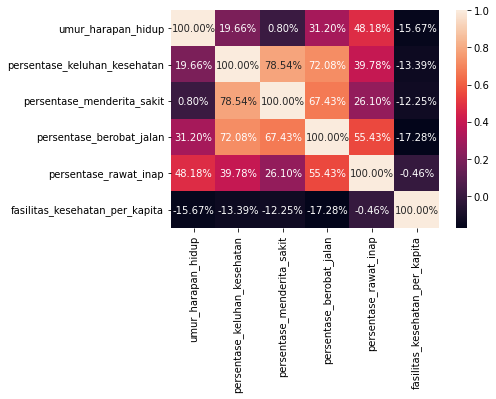

In [43]:
#Linearity test
corr = df.corr()
hmcorr = sns.heatmap(corr, annot=True, fmt='.2%')
hmcorr
plt.show()

In [44]:
#Multicollinearity test
features = ['persentase_keluhan_kesehatan','persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','fasilitas_kesehatan_per_kapita']

X = df[features]
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_variables = X.columns
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = pd.DataFrame({'Variable': model_variables, 'VIF': vif_values})
vif
vif.sort_values('VIF', ascending=False).reset_index(drop=True)

,Variable,VIF
0,persentase_keluhan_kesehatan,44.172194
1,persentase_menderita_sakit,34.895177
2,persentase_berobat_jalan,24.253070
3,persentase_rawat_inap,12.054668
4,fasilitas_kesehatan_per_kapita,2.838906


In [45]:
#Multicollinearity test 2
features = ['persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','fasilitas_kesehatan_per_kapita']

X = df[features]
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_variables = X.columns
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = pd.DataFrame({'Variable': model_variables, 'VIF': vif_values})
vif
vif.sort_values('VIF', ascending=False).reset_index(drop=True)

,Variable,VIF
0,persentase_berobat_jalan,22.425176
1,persentase_menderita_sakit,16.945023
2,persentase_rawat_inap,11.226639
3,fasilitas_kesehatan_per_kapita,2.800182


In [46]:
#Multicollinearity test 3
features = ['persentase_menderita_sakit','persentase_rawat_inap','fasilitas_kesehatan_per_kapita']

X = df[features]
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_variables = X.columns
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = pd.DataFrame({'Variable': model_variables, 'VIF': vif_values})
vif
vif.sort_values('VIF', ascending=False).reset_index(drop=True)

,Variable,VIF
0,persentase_rawat_inap,7.617356
1,persentase_menderita_sakit,7.516802
2,fasilitas_kesehatan_per_kapita,2.692489


In [47]:
#define response variable
y = df['umur_harapan_hidup']

#define predictor variables
x = df[['persentase_menderita_sakit','persentase_rawat_inap','fasilitas_kesehatan_per_kapita']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [48]:
#Heteroscedasticity test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 15.915158488321504, 'Test Statistic p-value': 0.06867457776091156, 'F-Statistic': 1.7914883614613013, 'F-Test p-value': 0.06758263923646556}


##ANALISIS REGRESI

In [49]:
X = sm.add_constant(df[['persentase_menderita_sakit','persentase_rawat_inap','fasilitas_kesehatan_per_kapita']].to_numpy())
y = df['umur_harapan_hidup'].to_numpy()
LR = sm.OLS(y, X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     59.06
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           2.36e-32
Time:                        13:28:23   Log-Likelihood:                -1134.5
No. Observations:                 468   AIC:                             2277.
Df Residuals:                     464   BIC:                             2294.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.6112      0.563    119.988      0.0

Persentase Menderita Sakit
*   r_0.8% (sangat lemah)
*   p-value_0.000 (<0.05 signifikan)
*   t-test_-3.608 (<-1.9651 berpengaruh)

Persentase Rawat Inap
*   r_48.18% (sedang)
*   p-value_0.000 (<0.05 signifikan)
*   t-test_12.702 (>1.9651 berpengaruh)

Persentase Fasilitas Kesehatan Per Kapita
*   r_-15.67% (sangat lemah)
*   p-value_0.000 (<0.05 signifikan)
*   t-test_-4.334(<-1.9651 berpengaruh)

Model Regresi
*   F-test_59.06 (>8.53239671 simultan)
*   Adj R-squared_0.272 (rendah)